In [8]:
import ot as ot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [15]:
data = pd.read_stata('JPSAERdata.dta')


In [17]:
data.columns

Index(['newid', 'intview', 'yymm', 'cfood', 'csnd', 'cndur', 'dcf', 'dcs',
       'dcn', 'dlcf', 'dlcs', 'dlcn', 'dnumadult', 'dnumkids', 'age', 'taxreb',
       'itaxreb', 'ltaxreb', 'iltaxreb', 'l2taxreb', 'il2taxreb', 'itotalreb',
       'income', 'liqassii', 'sample', 'samplesm', 'samplelg', 'dcfdhome',
       'dcfdaway', 'dcalcbev', 'dcutilhop', 'dcpersmisc', 'dcgasptr',
       'dctobac', 'dcappar', 'dchealth', 'dcread', 'sharefdhome',
       'sharefdaway', 'sharealcbev', 'shareutilhop', 'sharepersmisc',
       'sharegasptr', 'sharetobac', 'shareappar', 'sharehealth', 'shareread'],
      dtype='object')

(array([13212.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2364.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

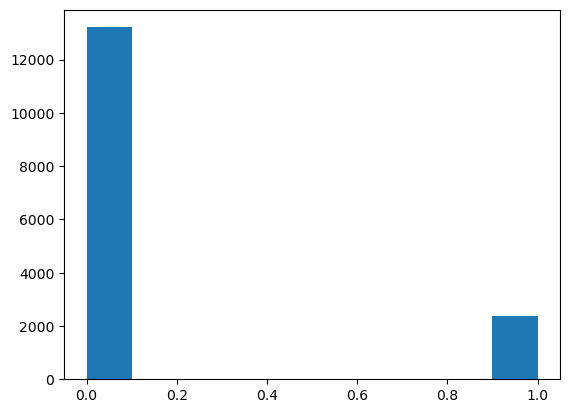

In [23]:
plt.hist(data['itaxreb'])

(array([4808., 3632., 1790.,  788.,  267.,   73.,   37.,   10.,    0.,
          13.]),
 array([  -500.,  31630.,  63760.,  95890., 128020., 160150., 192280.,
        224410., 256540., 288670., 320800.]),
 <BarContainer object of 10 artists>)

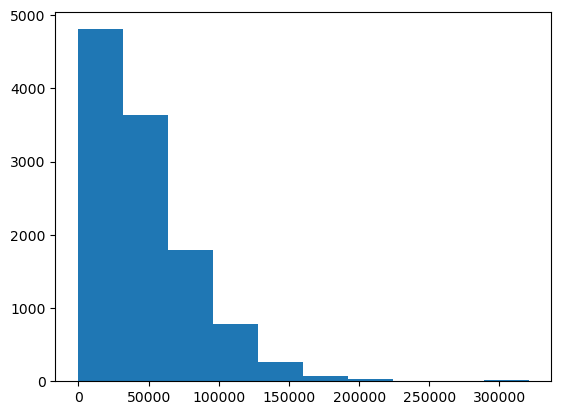

In [25]:
plt.hist(data['income'])

(array([1.0075e+04, 6.6500e+02, 4.0000e+02, 1.6900e+02, 6.4000e+01,
        3.4000e+01, 6.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.,  30000.,  60000.,  90000., 120000., 150000., 180000.,
        210000., 240000., 270000., 300000.]),
 <BarContainer object of 10 artists>)

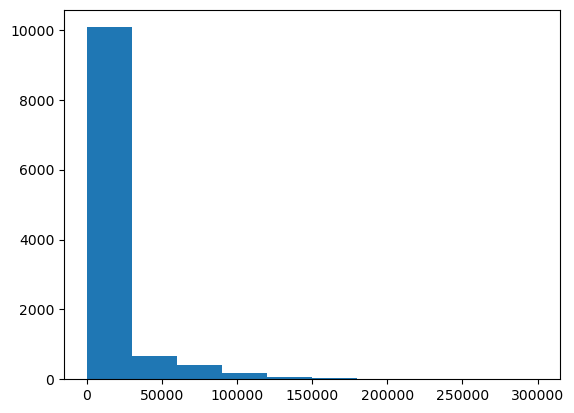

In [24]:
plt.hist(data['income']*(data['itaxreb']))

In [9]:
sample = data[(data['taxreb'] == 600) & (data['dnumkids'] == 0) & (data['dnumadult'] == 0) & (data['age']<=58) ]
nosample = data[(data['taxreb'] == 300) & (data['dnumkids'] == 0) & (data['dnumadult'] == 0)&(data['age']<=58)]

xs = sample['dcn']
xs = xs.to_numpy()
xt = nosample['dcn']
xt = xt.to_numpy()
xs_reshaped = xs.reshape(-1, 1)
xt_reshaped = xt.reshape(-1, 1)
s_array = np.arange(20, 140, 20)
plabebo_statistics = np.zeros((len(s_array),1))
j=0
for d in s_array:
    placebo_samples = 100
    s = np.zeros((placebo_samples,1))
    for i in range(placebo_samples):
        xs_placebo_1  = np.random.choice(xs, size=len(xs), replace=True)
        xs_placebo_2  = np.random.choice(xs, size=len(xs), replace=True)

        xs_placebo_1_reshaped = xs_placebo_1.reshape(-1, 1)
        xs_placebo_2_reshaped = xs_placebo_2.reshape(-1, 1)
        Mp = ot.dist(xs_placebo_1_reshaped, xs_placebo_2_reshaped, metric='cityblock')
        M=Mp>d

        # Assuming your dataset is in a numpy array called data

        # Fit KDE to data
        kde_xs1 = gaussian_kde(xs_placebo_1)
        kde_xs2 = gaussian_kde(xs_placebo_2)
        W = ot.emd2(kde_xs1(xs_placebo_1)/np.sum(kde_xs1(xs_placebo_1)), kde_xs2(xs_placebo_2)/np.sum(kde_xs2(xs_placebo_2)), M) 
        s[i] = W
    average_s = np.mean(s)
    print(f'{j+1}th Step Average W Statistic {np.mean(s)}')
    plabebo_statistics[j] = average_s
    j=j+1
    W_statistic = np.zeros((len(s_array),1))
j = 0
for d in s_array:
    # Fit KDE to data
    kde_xs = gaussian_kde(xs)
    kde_xt = gaussian_kde(xt)
    #run ot
    Mp = ot.dist(xs_reshaped, xt_reshaped, metric='cityblock')
    M=Mp>d
    W = ot.emd2(kde_xs(xs)/np.sum(kde_xs(xs)), kde_xt(xt)/np.sum(kde_xt(xt)), M) 
    W_statistic[j] = W
    print(f'{j+1}th Step W Statistic {W} where d={d} and placebo W statistic is {plabebo_statistics[j]}')
    j=j+1

1th Step Average W Statistic 0.13669310100880486
2th Step Average W Statistic 0.08515879008659358
3th Step Average W Statistic 0.05991274327443187
4th Step Average W Statistic 0.046009131082428566
5th Step Average W Statistic 0.0369904360227
6th Step Average W Statistic 0.03228565804781013
1th Step W Statistic 0.2646497270282326 where d=20 and placebo W statistic is [0.1366931]
2th Step W Statistic 0.23360355636176097 where d=40 and placebo W statistic is [0.08515879]
3th Step W Statistic 0.2259468983800186 where d=60 and placebo W statistic is [0.05991274]
4th Step W Statistic 0.2069267870340965 where d=80 and placebo W statistic is [0.04600913]
5th Step W Statistic 0.19249011821159634 where d=100 and placebo W statistic is [0.03699044]
6th Step W Statistic 0.17384825599734885 where d=120 and placebo W statistic is [0.03228566]


In [10]:
data = pd.read_stata('JPSAERdata.dta')
sample = data[(data['taxreb'] == 600) & (data['dnumkids'] == 0) & (data['dnumadult'] == 0) & (data['age']>=58) ]
nosample = data[(data['taxreb'] == 300) & (data['dnumkids'] == 0) & (data['dnumadult'] == 0)&(data['age']>=58)]

xs = sample['dcn']
xs = xs.to_numpy()
xt = nosample['dcn']
xt = xt.to_numpy()
xs_reshaped = xs.reshape(-1, 1)
xt_reshaped = xt.reshape(-1, 1)
s_array = np.arange(20, 140, 20)
plabebo_statistics = np.zeros((len(s_array),1))
j=0
for d in s_array:
    placebo_samples = 100
    s = np.zeros((placebo_samples,1))
    for i in range(placebo_samples):
        xs_placebo_1  = np.random.choice(xs, size=len(xs), replace=True)
        xs_placebo_2  = np.random.choice(xs, size=len(xs), replace=True)

        xs_placebo_1_reshaped = xs_placebo_1.reshape(-1, 1)
        xs_placebo_2_reshaped = xs_placebo_2.reshape(-1, 1)
        Mp = ot.dist(xs_placebo_1_reshaped, xs_placebo_2_reshaped, metric='cityblock')
        M=Mp>d

        # Assuming your dataset is in a numpy array called data

        # Fit KDE to data
        kde_xs1 = gaussian_kde(xs_placebo_1)
        kde_xs2 = gaussian_kde(xs_placebo_2)
        W = ot.emd2(kde_xs1(xs_placebo_1)/np.sum(kde_xs1(xs_placebo_1)), kde_xs2(xs_placebo_2)/np.sum(kde_xs2(xs_placebo_2)), M) 
        s[i] = W
    average_s = np.mean(s)
    print(f'{j+1}th Step Average W Statistic {np.mean(s)}')
    plabebo_statistics[j] = average_s
    j=j+1
    W_statistic = np.zeros((len(s_array),1))
j = 0
for d in s_array:
    # Fit KDE to data
    kde_xs = gaussian_kde(xs)
    kde_xt = gaussian_kde(xt)
    #run ot
    Mp = ot.dist(xs_reshaped, xt_reshaped, metric='cityblock')
    M=Mp>d
    W = ot.emd2(kde_xs(xs)/np.sum(kde_xs(xs)), kde_xt(xt)/np.sum(kde_xt(xt)), M) 
    W_statistic[j] = W
    print(f'{j+1}th Step W Statistic {W} where d={d} and placebo W statistic is {plabebo_statistics[j]}')
    j=j+1

1th Step Average W Statistic 0.30818811908727883
2th Step Average W Statistic 0.20540873493158673
3th Step Average W Statistic 0.15792452969148513
4th Step Average W Statistic 0.12993710307580178
5th Step Average W Statistic 0.1006271030112391
6th Step Average W Statistic 0.08905437480313999
1th Step W Statistic 0.302657390485906 where d=20 and placebo W statistic is [0.30818812]
2th Step W Statistic 0.19937347838025296 where d=40 and placebo W statistic is [0.20540873]
3th Step W Statistic 0.15656462548958947 where d=60 and placebo W statistic is [0.15792453]
4th Step W Statistic 0.12952022735529534 where d=80 and placebo W statistic is [0.1299371]
5th Step W Statistic 0.12122821031270666 where d=100 and placebo W statistic is [0.1006271]
6th Step W Statistic 0.11848738207198771 where d=120 and placebo W statistic is [0.08905437]


In [11]:
sample = data[(data['taxreb'] == 600) & (data['dnumkids'] == 0) & (data['dnumadult'] == 0) & (data['age']<=40)]
nosample = data[(data['taxreb'] == 300) & (data['dnumkids'] == 0) & (data['dnumadult'] == 0)&(data['age']<=40)]

xs = sample['dcn']
xs = xs.to_numpy()
xt = nosample['dcn']
xt = xt.to_numpy()
xs_reshaped = xs.reshape(-1, 1)
xt_reshaped = xt.reshape(-1, 1)
s_array = np.arange(20, 140, 20)
plabebo_statistics = np.zeros((len(s_array),1))
j=0
for d in s_array:
    placebo_samples = 100
    s = np.zeros((placebo_samples,1))
    for i in range(placebo_samples):
        xs_placebo_1  = np.random.choice(xs, size=len(xs), replace=True)
        xs_placebo_2  = np.random.choice(xs, size=len(xs), replace=True)

        xs_placebo_1_reshaped = xs_placebo_1.reshape(-1, 1)
        xs_placebo_2_reshaped = xs_placebo_2.reshape(-1, 1)
        Mp = ot.dist(xs_placebo_1_reshaped, xs_placebo_2_reshaped, metric='cityblock')
        M=Mp>d

        # Assuming your dataset is in a numpy array called data

        # Fit KDE to data
        kde_xs1 = gaussian_kde(xs_placebo_1)
        kde_xs2 = gaussian_kde(xs_placebo_2)
        W = ot.emd2(kde_xs1(xs_placebo_1)/np.sum(kde_xs1(xs_placebo_1)), kde_xs2(xs_placebo_2)/np.sum(kde_xs2(xs_placebo_2)), M) 
        s[i] = W
    average_s = np.mean(s)
    print(f'{j+1}th Step Average W Statistic {np.mean(s)}')
    plabebo_statistics[j] = average_s
    j=j+1
    W_statistic = np.zeros((len(s_array),1))
j = 0
for d in s_array:
    # Fit KDE to data
    kde_xs = gaussian_kde(xs)
    kde_xt = gaussian_kde(xt)
    #run ot
    Mp = ot.dist(xs_reshaped, xt_reshaped, metric='cityblock')
    M=Mp>d
    W = ot.emd2(kde_xs(xs)/np.sum(kde_xs(xs)), kde_xt(xt)/np.sum(kde_xt(xt)), M) 
    W_statistic[j] = W
    print(f'{j+1}th Step W Statistic {W} where d={d} and placebo W statistic is {plabebo_statistics[j]}')
    j=j+1


1th Step Average W Statistic 0.2515600537255186
2th Step Average W Statistic 0.1645733465560645
3th Step Average W Statistic 0.1206796619431415
4th Step Average W Statistic 0.09813899596933337
5th Step Average W Statistic 0.08975233268987491
6th Step Average W Statistic 0.07252394779835135
1th Step W Statistic 0.31547934411121914 where d=20 and placebo W statistic is [0.25156005]
2th Step W Statistic 0.2803428242932217 where d=40 and placebo W statistic is [0.16457335]
3th Step W Statistic 0.26546577243107167 where d=60 and placebo W statistic is [0.12067966]
4th Step W Statistic 0.2378033176104947 where d=80 and placebo W statistic is [0.098139]
5th Step W Statistic 0.21754284598696447 where d=100 and placebo W statistic is [0.08975233]
6th Step W Statistic 0.2003411530595969 where d=120 and placebo W statistic is [0.07252395]


In [12]:
sample = data[(data['taxreb'] == 600) & (data['dnumkids'] == 0) & (data['dnumadult'] == 0) ]
nosample = data[(data['taxreb'] == 300) & (data['dnumkids'] == 0) & (data['dnumadult'] == 0)]

xs = sample['dcn']
xs = xs.to_numpy()
xt = nosample['dcn']
xt = xt.to_numpy()
xs_reshaped = xs.reshape(-1, 1)
xt_reshaped = xt.reshape(-1, 1)
s_array = np.arange(20, 140, 20)
plabebo_statistics = np.zeros((len(s_array),1))
j=0
for d in s_array:
    placebo_samples = 100
    s = np.zeros((placebo_samples,1))
    for i in range(placebo_samples):
        xs_placebo_1  = np.random.choice(xs, size=len(xs), replace=True)
        xs_placebo_2  = np.random.choice(xs, size=len(xs), replace=True)

        xs_placebo_1_reshaped = xs_placebo_1.reshape(-1, 1)
        xs_placebo_2_reshaped = xs_placebo_2.reshape(-1, 1)
        Mp = ot.dist(xs_placebo_1_reshaped, xs_placebo_2_reshaped, metric='cityblock')
        M=Mp>d

        # Assuming your dataset is in a numpy array called data

        # Fit KDE to data
        kde_xs1 = gaussian_kde(xs_placebo_1)
        kde_xs2 = gaussian_kde(xs_placebo_2)
        W = ot.emd2(kde_xs1(xs_placebo_1)/np.sum(kde_xs1(xs_placebo_1)), kde_xs2(xs_placebo_2)/np.sum(kde_xs2(xs_placebo_2)), M) 
        s[i] = W
    average_s = np.mean(s)
    print(f'{j+1}th Step Average W Statistic {np.mean(s)}')
    plabebo_statistics[j] = average_s
    j=j+1
    W_statistic = np.zeros((len(s_array),1))
j = 0
for d in s_array:
    # Fit KDE to data
    kde_xs = gaussian_kde(xs)
    kde_xt = gaussian_kde(xt)
    #run ot
    Mp = ot.dist(xs_reshaped, xt_reshaped, metric='cityblock')
    M=Mp>d
    W = ot.emd2(kde_xs(xs)/np.sum(kde_xs(xs)), kde_xt(xt)/np.sum(kde_xt(xt)), M) 
    W_statistic[j] = W
    print(f'{j+1}th Step W Statistic {W} where d={d} and placebo W statistic is {plabebo_statistics[j]}')
    j=j+1


1th Step Average W Statistic 0.11477634722454262
2th Step Average W Statistic 0.06910830320630562
3th Step Average W Statistic 0.048726992714924616
4th Step Average W Statistic 0.037083575264966986
5th Step Average W Statistic 0.02795555268008895
6th Step Average W Statistic 0.020965028399595735
1th Step W Statistic 0.23236465913295237 where d=20 and placebo W statistic is [0.11477635]
2th Step W Statistic 0.20992447846178725 where d=40 and placebo W statistic is [0.0691083]
3th Step W Statistic 0.201586142868682 where d=60 and placebo W statistic is [0.04872699]
4th Step W Statistic 0.18349114123096197 where d=80 and placebo W statistic is [0.03708358]
5th Step W Statistic 0.16975028986358173 where d=100 and placebo W statistic is [0.02795555]
6th Step W Statistic 0.15014934403234095 where d=120 and placebo W statistic is [0.02096503]


In [13]:
sample = data[(data['taxreb'] == 600)  ]
nosample = data[(data['taxreb'] == 300) ]

xs = sample['dcn']
xs = xs.to_numpy()
xt = nosample['dcn']
xt = xt.to_numpy()
xs_reshaped = xs.reshape(-1, 1)
xt_reshaped = xt.reshape(-1, 1)
s_array = np.arange(20, 140, 20)
plabebo_statistics = np.zeros((len(s_array),1))
j=0
for d in s_array:
    placebo_samples = 100
    s = np.zeros((placebo_samples,1))
    for i in range(placebo_samples):
        xs_placebo_1  = np.random.choice(xs, size=len(xs), replace=True)
        xs_placebo_2  = np.random.choice(xs, size=len(xs), replace=True)

        xs_placebo_1_reshaped = xs_placebo_1.reshape(-1, 1)
        xs_placebo_2_reshaped = xs_placebo_2.reshape(-1, 1)
        Mp = ot.dist(xs_placebo_1_reshaped, xs_placebo_2_reshaped, metric='cityblock')
        M=Mp>d

        # Assuming your dataset is in a numpy array called data

        # Fit KDE to data
        kde_xs1 = gaussian_kde(xs_placebo_1)
        kde_xs2 = gaussian_kde(xs_placebo_2)
        W = ot.emd2(kde_xs1(xs_placebo_1)/np.sum(kde_xs1(xs_placebo_1)), kde_xs2(xs_placebo_2)/np.sum(kde_xs2(xs_placebo_2)), M) 
        s[i] = W
    average_s = np.mean(s)
    print(f'{j+1}th Step Average W Statistic {np.mean(s)}')
    plabebo_statistics[j] = average_s
    j=j+1
    W_statistic = np.zeros((len(s_array),1))
j = 0
for d in s_array:
    # Fit KDE to data
    kde_xs = gaussian_kde(xs)
    kde_xt = gaussian_kde(xt)
    #run ot
    Mp = ot.dist(xs_reshaped, xt_reshaped, metric='cityblock')
    M=Mp>d
    W = ot.emd2(kde_xs(xs)/np.sum(kde_xs(xs)), kde_xt(xt)/np.sum(kde_xt(xt)), M) 
    W_statistic[j] = W
    print(f'{j+1}th Step W Statistic {W} where d={d} and placebo W statistic is {plabebo_statistics[j]}')
    j=j+1


1th Step Average W Statistic 0.11042282602779052
2th Step Average W Statistic 0.06598542156134454
3th Step Average W Statistic 0.049365275646370096
4th Step Average W Statistic 0.03511836025278277
5th Step Average W Statistic 0.029180780356600503
6th Step Average W Statistic 0.019815576057766727
1th Step W Statistic 0.22808286340157854 where d=20 and placebo W statistic is [0.11042283]
2th Step W Statistic 0.2059358949806455 where d=40 and placebo W statistic is [0.06598542]
3th Step W Statistic 0.1978646838998756 where d=60 and placebo W statistic is [0.04936528]
4th Step W Statistic 0.1784874506157257 where d=80 and placebo W statistic is [0.03511836]
5th Step W Statistic 0.16699549781964976 where d=100 and placebo W statistic is [0.02918078]
6th Step W Statistic 0.14757962422563226 where d=120 and placebo W statistic is [0.01981558]


In [14]:
sample = data[(data['taxreb'] == 600) & (data['age']<=40) ]
nosample = data[(data['taxreb'] == 300)& (data['age']<=40) ]

xs = sample['dcn']
xs = xs.to_numpy()
xt = nosample['dcn']
xt = xt.to_numpy()
xs_reshaped = xs.reshape(-1, 1)
xt_reshaped = xt.reshape(-1, 1)
s_array = np.arange(20, 140, 20)
plabebo_statistics = np.zeros((len(s_array),1))
j=0
for d in s_array:
    placebo_samples = 100
    s = np.zeros((placebo_samples,1))
    for i in range(placebo_samples):
        xs_placebo_1  = np.random.choice(xs, size=len(xs), replace=True)
        xs_placebo_2  = np.random.choice(xs, size=len(xs), replace=True)

        xs_placebo_1_reshaped = xs_placebo_1.reshape(-1, 1)
        xs_placebo_2_reshaped = xs_placebo_2.reshape(-1, 1)
        Mp = ot.dist(xs_placebo_1_reshaped, xs_placebo_2_reshaped, metric='cityblock')
        M=Mp>d

        # Assuming your dataset is in a numpy array called data

        # Fit KDE to data
        kde_xs1 = gaussian_kde(xs_placebo_1)
        kde_xs2 = gaussian_kde(xs_placebo_2)
        W = ot.emd2(kde_xs1(xs_placebo_1)/np.sum(kde_xs1(xs_placebo_1)), kde_xs2(xs_placebo_2)/np.sum(kde_xs2(xs_placebo_2)), M) 
        s[i] = W
    average_s = np.mean(s)
    print(f'{j+1}th Step Average W Statistic {np.mean(s)}')
    plabebo_statistics[j] = average_s
    j=j+1
    W_statistic = np.zeros((len(s_array),1))
j = 0
for d in s_array:
    # Fit KDE to data
    kde_xs = gaussian_kde(xs)
    kde_xt = gaussian_kde(xt)
    #run ot
    Mp = ot.dist(xs_reshaped, xt_reshaped, metric='cityblock')
    M=Mp>d
    W = ot.emd2(kde_xs(xs)/np.sum(kde_xs(xs)), kde_xt(xt)/np.sum(kde_xt(xt)), M) 
    W_statistic[j] = W
    print(f'{j+1}th Step W Statistic {W} where d={d} and placebo W statistic is {plabebo_statistics[j]}')
    j=j+1


1th Step Average W Statistic 0.24641985706993075
2th Step Average W Statistic 0.1588449046942509
3th Step Average W Statistic 0.11216891659155195
4th Step Average W Statistic 0.0898759785907275
5th Step Average W Statistic 0.08268442806516157
6th Step Average W Statistic 0.06988121841965031
1th Step W Statistic 0.30398097529292134 where d=20 and placebo W statistic is [0.24641986]
2th Step W Statistic 0.263267671944829 where d=40 and placebo W statistic is [0.1588449]
3th Step W Statistic 0.24699046814199901 where d=60 and placebo W statistic is [0.11216892]
4th Step W Statistic 0.22034901746623003 where d=80 and placebo W statistic is [0.08987598]
5th Step W Statistic 0.19891525888815914 where d=100 and placebo W statistic is [0.08268443]
6th Step W Statistic 0.18305566287882666 where d=120 and placebo W statistic is [0.06988122]
